## M3 Question 1

### Exploratory Data Analysis

In [13]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [14]:
# Detect the encoding of the file
with open('Data/csv-1700-1830.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# Load in data
df1 = pd.read_csv("Data/csv-1700-1830.csv", encoding=encoding)
df2 = pd.read_csv("Data/csv-1831-2000.csv", encoding=encoding)
df3 = pd.read_csv("Data/csv-2001-2131.csv", encoding=encoding)

# Combine into one df
df = pd.concat([df1, df2, df3]) 

# Save combined data
df.to_csv('Data/combined_raw.csv', index=False)

In [15]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date(yyyyMMddHHmmss)'], format='%Y%m%d%H%M%S')
df.head()

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,date
0,mbdata,20140123170000,POK,Follow us @POK-Kronos,NaN,NaN,NaN,2014-01-23 17:00:00
1,mbdata,20140123170000,maha_Homeland,Don't miss a moment! Follow our live coverage...,NaN,NaN,NaN,2014-01-23 17:00:00
2,mbdata,20140123170000,Viktor-E,Come join us in the Park! Music tonight at Abi...,NaN,NaN,NaN,2014-01-23 17:00:00
3,mbdata,20140123170000,KronosStar,POK rally to start in Abila City Park. POK lea...,NaN,NaN,NaN,2014-01-23 17:00:00
4,mbdata,20140123170000,AbilaPost,POK rally set to take place in Abila City Park...,NaN,NaN,NaN,2014-01-23 17:00:00


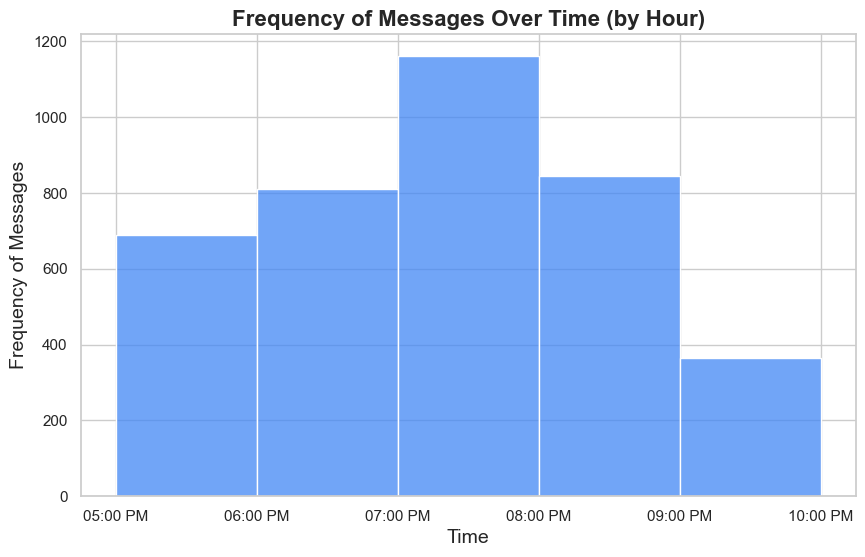

In [16]:
# Frequency of messages over time (mbdata) 
# Group by hour
df['hour'] = df['date'].dt.hour 

# Create histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_edges = pd.date_range('2014-01-23 17:00:00', '2014-01-23 22:00:00', freq='h')
sns.histplot(df[df['type'] == 'mbdata']['hour'], bins=bin_edges.hour, color='#4287f5', kde=False)

# Labels & title
plt.title('Frequency of Messages Over Time (by Hour)', fontsize=16, weight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Frequency of Messages', fontsize=14)
formatted_ticks = [tick.strftime('%I:%M %p') for tick in bin_edges]
plt.xticks([17, 18, 19, 20, 21, 22], formatted_ticks)
plt.grid(True)
plt.show()

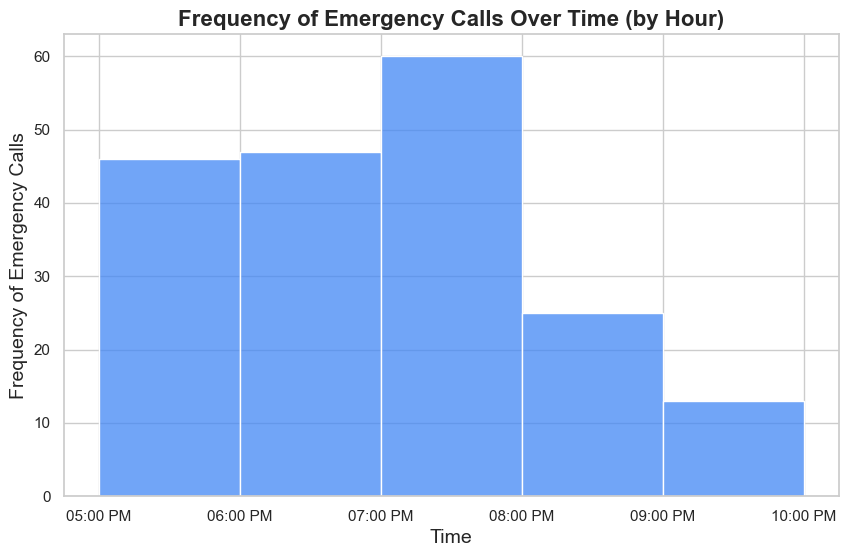

In [17]:
# Frequency of calls over time (ccdata) 

# Create histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_edges = pd.date_range('2014-01-23 17:00:00', '2014-01-23 22:00:00', freq='h')
sns.histplot(df[df['type'] == 'ccdata']['hour'], bins=bin_edges.hour, color='#4287f5', kde=False)

# Labels & title
plt.title('Frequency of Emergency Calls Over Time (by Hour)', fontsize=16, weight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Frequency of Emergency Calls', fontsize=14)
formatted_ticks = [tick.strftime('%I:%M %p') for tick in bin_edges]
plt.xticks([17, 18, 19, 20, 21, 22], formatted_ticks)
plt.grid(True)
plt.show()

As seen in the two histograms above, the most messages (mbdata) and emergency calls (ccdata) occur between 7-8PM. This could point to the height of the incident occuring around this time. 

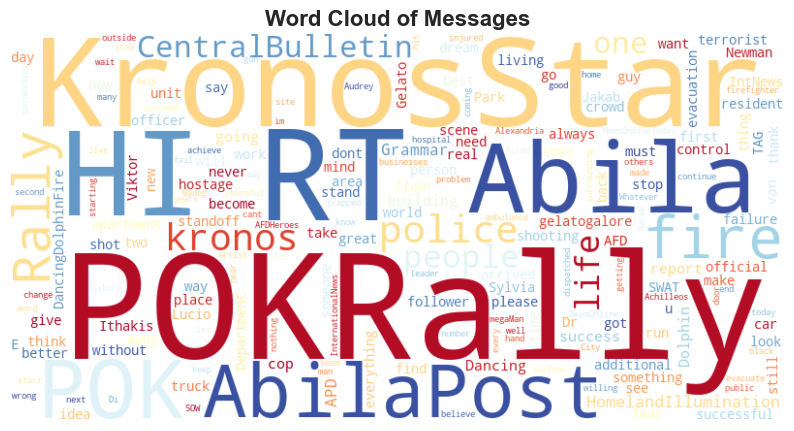

In [35]:
# Overall word cloud from mbdata
# Combine all messages into one string
all_mbdata = " ".join(df[df['type'] == 'mbdata']['message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='RdYlBu_r', collocations=False).generate(all_mbdata)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of Messages', fontsize=16, weight='bold')
plt.show()

Potentially important words: POKRally, HomelandIlluminations, KronosStar, Abila, AbilaPost

In [24]:
# Inspecting the ccdata
cc_df = df[df['type'] == 'ccdata']
len(cc_df)
cc_df.head()

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,date,hour
9,ccdata,20140123170000,NaN,KEEP THE PEACE-CROWD CONTROL/ABILA CITY PARK,NaN,NaN,Egeou St / Parla St,2014-01-23 17:00:00,17
28,ccdata,20140123170210,NaN,TRAFFIC STOP,NaN,NaN,N. Els St / N. Polvo St,2014-01-23 17:02:10,17
59,ccdata,20140123170513,NaN,PARK CHECK,NaN,NaN,2099 Sannan Pky,2014-01-23 17:05:13,17
123,ccdata,20140123171102,NaN,DISTURBANCE-NOISE,NaN,NaN,3654 N. Barwyn St,2014-01-23 17:11:02,17
131,ccdata,20140123171153,NaN,ALARM-SECURE NO CRIME,NaN,NaN,3815 N. Blant St,2014-01-23 17:11:53,17


191 total emergency calls.

In [23]:
# Inspecting the mbdata
mb_df = df[df['type'] == 'mbdata']
len(mb_df)
mb_df.head()

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,date,hour
0,mbdata,20140123170000,POK,Follow us @POK-Kronos,NaN,NaN,NaN,2014-01-23 17:00:00,17
1,mbdata,20140123170000,maha_Homeland,Don't miss a moment! Follow our live coverage...,NaN,NaN,NaN,2014-01-23 17:00:00,17
2,mbdata,20140123170000,Viktor-E,Come join us in the Park! Music tonight at Abi...,NaN,NaN,NaN,2014-01-23 17:00:00,17
3,mbdata,20140123170000,KronosStar,POK rally to start in Abila City Park. POK lea...,NaN,NaN,NaN,2014-01-23 17:00:00,17
4,mbdata,20140123170000,AbilaPost,POK rally set to take place in Abila City Park...,NaN,NaN,NaN,2014-01-23 17:00:00,17


3872 total messages.

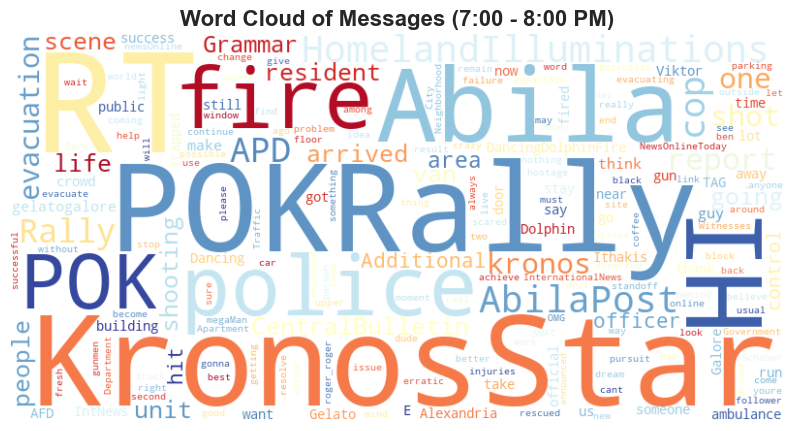

In [34]:
# Word cloud from 7-8pm
# Combine all messages into one string
all_mbdata = " ".join(mb_df[mb_df['hour'] == 19]['message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='RdYlBu_r', collocations=False).generate(all_mbdata)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of Messages (7:00 - 8:00 PM)', fontsize=16, weight='bold')
plt.show()

Looks similar to the overall word cloud, but police shows up a bit more, which could indicate an increased police prescence during this time.